In [6]:
import pandas as pd
df_svr = pd.read_csv('/mnt/data/macaulay/datas/genepedia/A_metrics_epoch_20.csv')
df_svr

,Epoch,Correlation_Coefficient,P_Value,Test_Loss
0,20.01000,-0.208059,0.269900,0.207108
1,20.02000,0.056962,0.764956,0.028696
2,20.03000,-0.264135,0.158408,0.135143
3,20.04000,-0.050299,0.791809,0.017147
4,20.05000,0.029657,0.876371,0.055082
...,...,...,...,...
17538,20.17539,0.046456,0.807410,0.020466
17539,20.17540,0.105643,0.578484,0.026285
17540,20.17541,-0.151504,0.424181,0.372827
17541,20.17542,0.086740,0.648556,0.009550


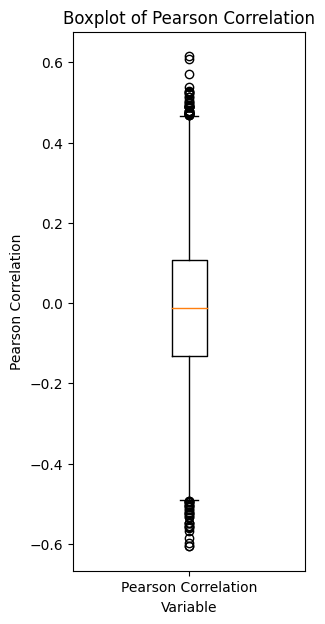

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract the Pearson correlation data
pearson_data = df_svr['Correlation_Coefficient']

# Create a boxplot
plt.figure(figsize=(3,7))
plt.boxplot(pearson_data)
plt.title('Boxplot of Pearson Correlation')
plt.xlabel('Variable')
plt.ylabel('Pearson Correlation')
plt.xticks([1], ['Pearson Correlation'])

plt.show()

In [8]:
mean = df_svr['Correlation_Coefficient'].mean()
mean

-0.012420428235516322

In [9]:
positive_count = (df_svr['Correlation_Coefficient'] > 0).sum()
negative_count = (df_svr['Correlation_Coefficient'] < 0).sum()

print(f'Number of positive correlations: {positive_count}')
print(f'Number of negative correlations: {negative_count}')

Number of positive correlations: 8316
Number of negative correlations: 9227


In [54]:
positive_count = (df_svr['pearson_correlation'] >= 0.4).sum()
negative_count = (df_svr['pearson_correlation'] < 0.4).sum()

print(f'Number of values higher than 0.4: {positive_count}')
print(f'Number of values lesser than 0.4: {negative_count}')

Number of values higher than 0.4: 105
Number of values lesser than 0.4: 17774


epoch
epoch
epoch
epoch
epoch
epoch
epoch
epoch
epoch
epoch
epoch
epoch
epoch
epoch
epoch
epoch
epoch
epoch
epoch
epoch


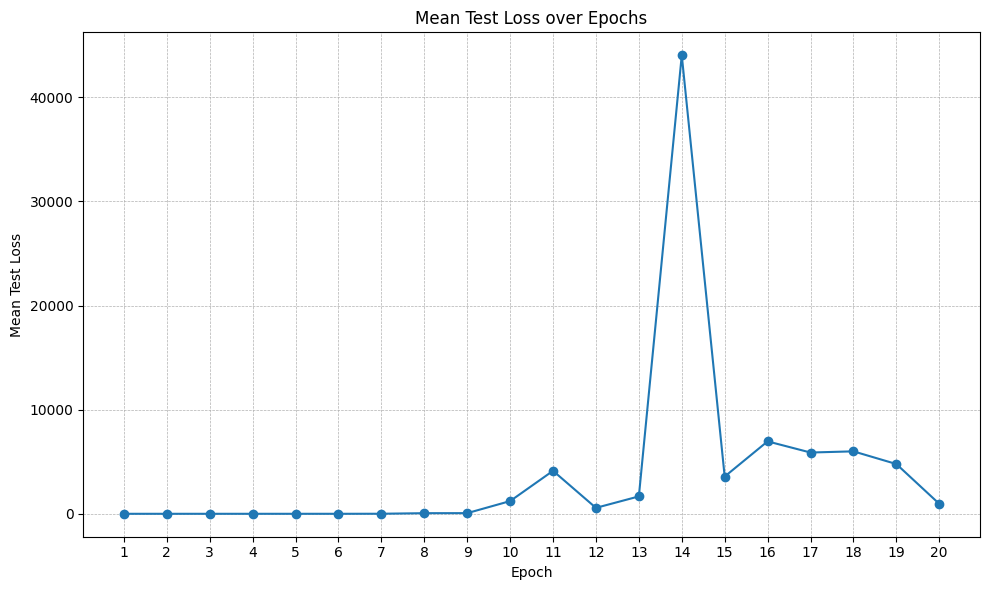

In [9]:
import pandas as pd
import matplotlib.pyplot as plt


mean_losses = []


for epoch in range(1, 21):
    print('epoch')
    file_path = f'/mnt/data/macaulay/model_state2/A_metrics_epoch_{epoch}.csv'
    df = pd.read_csv(file_path)
    mean_loss = df['Test_Loss'].mean()
    mean_losses.append(mean_loss)


plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), mean_losses, marker='o', linestyle='-')
plt.title("Mean Test Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Mean Test Loss")
plt.xticks(range(1, 21))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


In [10]:
mean_losses

[0.21540071426860583,
 0.18501828468387668,
 0.17644029317484966,
 0.21372170011422792,
 0.17148704729724598,
 0.43348622512953083,
 4.598946281105034,
 59.00648300681319,
 63.126122234664194,
 1220.748166136526,
 4128.473543919958,
 570.0695344987176,
 1671.4491413355156,
 44045.59197094703,
 3577.1654741990637,
 6956.621868172976,
 5885.304196654373,
 5998.754551430569,
 4780.9462923497795,
 961.3215251113998]

In [13]:
mean_losses_df = pd.DataFrame(mean_losses, columns=['mean_losses'])
mean_losses_df

,mean_losses
0,0.215401
1,0.185018
2,0.176440
3,0.213722
4,0.171487
5,0.433486
6,4.598946
7,59.006483
8,63.126122
9,1220.748166


In [18]:
df_train_loss = pd.read_csv('/mnt/data/macaulay/datas/average_training_losses.csv')
df_train_loss

,Training_Loss
0,0.065873
1,0.057005
2,0.053165
3,0.051751
4,0.051360
5,0.053615
6,0.055394
7,0.059353
8,0.065249
9,0.064064


In [19]:
df_losses = pd.concat([df_train_loss, mean_losses_df], axis=1)
df_losses

,Training_Loss,mean_losses
0,0.065873,0.215401
1,0.057005,0.185018
2,0.053165,0.176440
3,0.051751,0.213722
4,0.051360,0.171487
5,0.053615,0.433486
6,0.055394,4.598946
7,0.059353,59.006483
8,0.065249,63.126122
9,0.064064,1220.748166


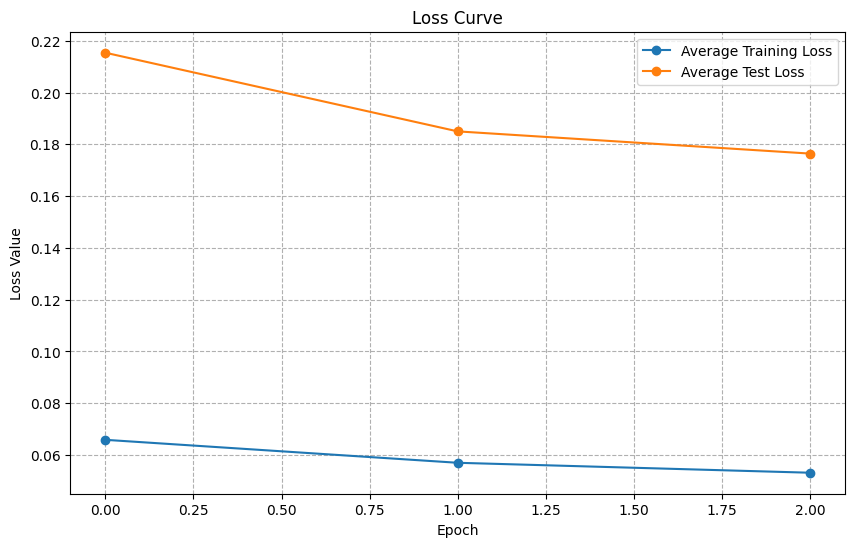

In [27]:
# Plot the data
# plt.figure(figsize=(10, 6))
# plt.plot(df['Training_Loss'], label='Average Training Loss', marker='o')
# plt.plot(df['mean_losses'], label='Mean Losses', marker='o')
# plt.title('Loss Curve')
# plt.xlabel('Epoch')
# plt.ylabel('Loss Value')
# plt.legend()
# plt.yscale('log')  # Using a logarithmic scale for y-axis due to the high variance in loss values
# plt.grid(True, which="both", ls="--")
# # Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df_losses['Training_Loss'].iloc[:3], label='Average Training Loss', marker='o')
plt.plot(df_losses['mean_losses'].iloc[:3], label='Average Test Loss', marker='o')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

In [ ]:

# each_gene_losses = []


# for epoch in range(1, 21):
#     file_path = f'/mnt/data/macaulay/model_state2/A_metrics_epoch_{epoch}.csv'
#     df = pd.read_csv(file_path)
#     each_gene_loss = df['Test_Loss'].iloc[1]
#     each_gene_losses.append(each_gene_loss)


# plt.figure(figsize=(10, 6))
# plt.plot(range(1, 21), each_gene_losses, marker='o', linestyle='-')
# plt.title("Each gene Test Loss over Epochs")
# plt.xlabel("Epoch")
# plt.ylabel(" Test Loss")
# plt.xticks(range(1, 21))
# plt.grid(True, which='both', linestyle='--', linewidth=0.5)
# plt.tight_layout()
# plt.show()


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

for i in range(1, 2):

    file_A = pd.read_csv(f'/mnt/data/macaulay/model_state2/A_metrics_epoch_{i}.csv')
    file_B = pd.read_csv(f'/mnt/data/macaulay/model_state2/B_metrics_epoch_{i}.csv')
    file_C = pd.read_csv(f'/mnt/data/macaulay/model_state2/C_metrics_epoch_{i}.csv')

    data = [file_A["Correlation_Coefficient"], file_B["Correlation_Coefficient"], file_C["Correlation_Coefficient"]]

    positive_count_A = (file_A["Correlation_Coefficient"] > 0).sum()
    negative_count_A= (file_A["Correlation_Coefficient"] < 0).sum()
    positive_count_B = (file_B["Correlation_Coefficient"] > 0).sum()
    negative_count_B= (file_B["Correlation_Coefficient"] < 0).sum()
    positive_count_C = (file_C["Correlation_Coefficient"] > 0).sum()
    negative_count_C = (file_C["Correlation_Coefficient"] < 0).sum()

    print('=====================================================')
    print(f'Number of positive values for A: {positive_count_A}')
    print(f'Number of negative valuesfor A: {negative_count_A}')
    print('=====================================================')
    print(f'Number of positive values for B: {positive_count_B}')
    print(f'Number of negative valuesfor B: {negative_count_B}')
    print('=====================================================')
    print(f'Number of positive values for C: {positive_count_C}')
    print(f'Number of negative valuesfor C: {negative_count_C}')


    plt.figure(figsize=(5, 5))
    plt.boxplot(data, vert=True, patch_artist=True, labels=['A (Test Cell line + Train gene)', 
                                                        'B (Train cell line + Test gene)', 
                                                        'C (Test cell line +Test gene)'])
    plt.title(f'Boxplot of all Correlation Coefficients of Epoch {i}')
    plt.ylabel('Correlation Coefficient')
    plt.xticks(rotation=15)
    plt.tight_layout()

    plt.show()



    # Calculate and print the median value
    medians = [np.median(file_A["Correlation_Coefficient"]), np.median(file_B["Correlation_Coefficient"]), np.median(file_C["Correlation_Coefficient"])]
    for i, median in enumerate(medians):
        plt.text(i + 1, median, f"Median: {median:.2f}", verticalalignment='bottom', horizontalalignment='left')

    plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/macaulay/model_state2/A_metrics_epoch_1.csv'

Number of positive values for A: 8595
Number of negative valuesfor A: 8948
Number of positive values for B: 45
Number of negative valuesfor B: 55
Number of positive values for C: 44
Number of negative valuesfor C: 56


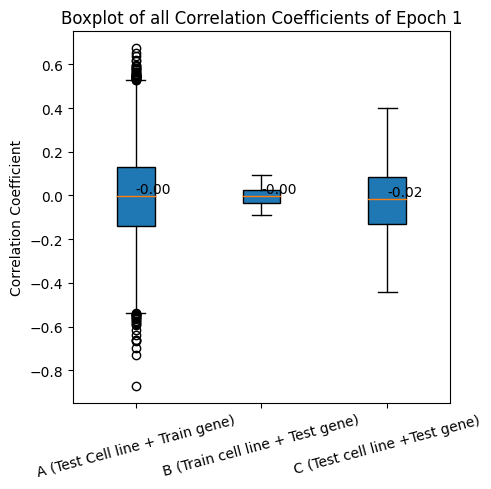

Number of positive values for A: 8632
Number of negative valuesfor A: 8911
Number of positive values for B: 62
Number of negative valuesfor B: 38
Number of positive values for C: 43
Number of negative valuesfor C: 57


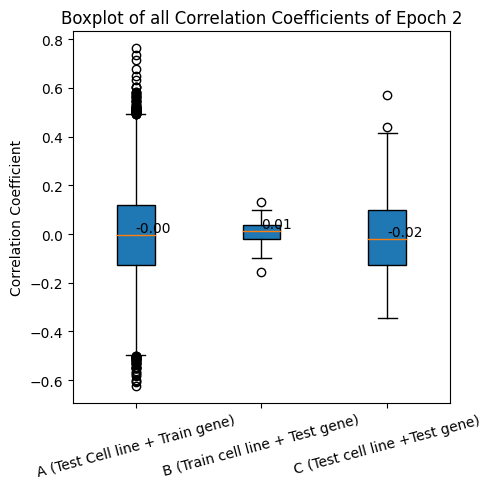

Number of positive values for A: 8532
Number of negative valuesfor A: 9011
Number of positive values for B: 59
Number of negative valuesfor B: 41
Number of positive values for C: 49
Number of negative valuesfor C: 51


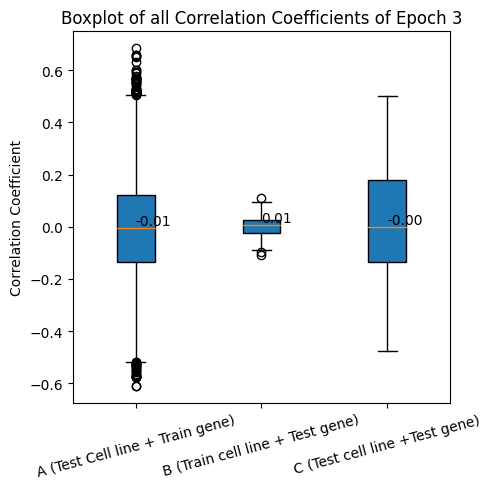

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

for i in range(1, 4):

    file_A = pd.read_csv(f'/mnt/data/macaulay/datas/A_metrics_epoch_{i}.csv')
    file_B = pd.read_csv(f'/mnt/data/macaulay/datas/B_metrics_epoch_{i}.csv')
    file_C = pd.read_csv(f'/mnt/data/macaulay/datas/C_metrics_epoch_{i}.csv')

    data = [file_A["Correlation_Coefficient"], file_B["Correlation_Coefficient"], file_C["Correlation_Coefficient"]]

    positive_count_A = (file_A["Correlation_Coefficient"] > 0).sum()
    negative_count_A= (file_A["Correlation_Coefficient"] < 0).sum()
    positive_count_B = (file_B["Correlation_Coefficient"] > 0).sum()
    negative_count_B= (file_B["Correlation_Coefficient"] < 0).sum()
    positive_count_C = (file_C["Correlation_Coefficient"] > 0).sum()
    negative_count_C = (file_C["Correlation_Coefficient"] < 0).sum()

    print('=====================================================')
    print(f'Number of positive values for A: {positive_count_A}')
    print(f'Number of negative valuesfor A: {negative_count_A}')
    print('=====================================================')
    print(f'Number of positive values for B: {positive_count_B}')
    print(f'Number of negative valuesfor B: {negative_count_B}')
    print('=====================================================')
    print(f'Number of positive values for C: {positive_count_C}')
    print(f'Number of negative valuesfor C: {negative_count_C}')


    plt.figure(figsize=(5, 5))
    plt.boxplot(data, vert=True, patch_artist=True, labels=['A (Test Cell line + Train gene)', 
                                                        'B (Train cell line + Test gene)', 
                                                        'C (Test cell line +Test gene)'])
    plt.title(f'Boxplot of all Correlation Coefficients of Epoch {i}')
    plt.ylabel('Correlation Coefficient')
    plt.xticks(rotation=15)
    plt.tight_layout()
    medians = [np.median(file_A["Correlation_Coefficient"]), np.median(file_B["Correlation_Coefficient"]), np.median(file_C["Correlation_Coefficient"])]
    for i, median in enumerate(medians):
        plt.text(i + 1, median, f"{median:.2f}", verticalalignment='bottom', horizontalalignment='left')


    plt.show()




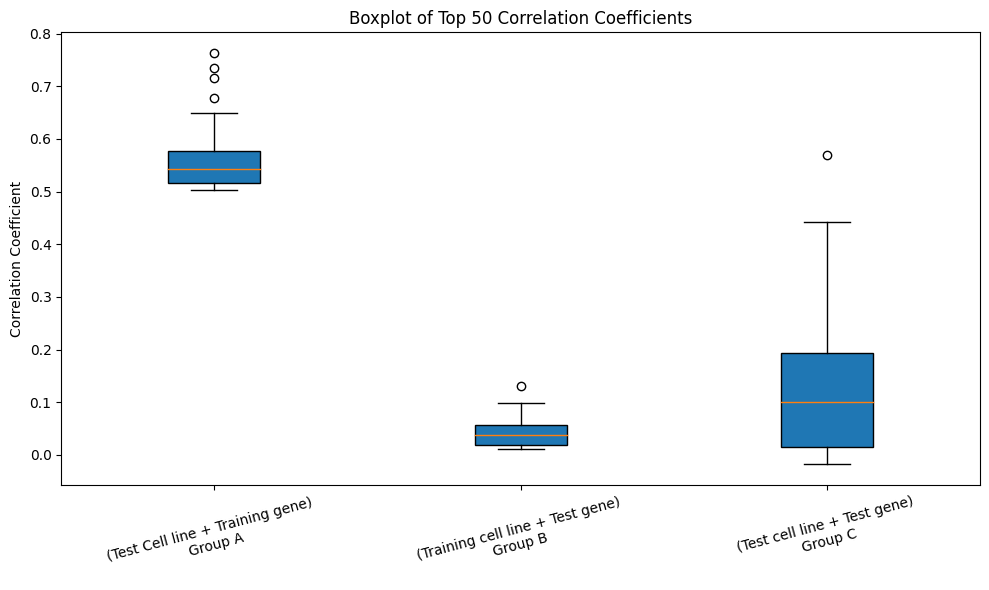

In [3]:
import matplotlib.pyplot as plt


for i in range(2, 3):

    file_A = pd.read_csv(f'/mnt/data/macaulay/datas/A_metrics_epoch_{i}.csv')
    file_B = pd.read_csv(f'/mnt/data/macaulay/datas/B_metrics_epoch_{i}.csv')
    file_C = pd.read_csv(f'/mnt/data/macaulay/datas/C_metrics_epoch_{i}.csv')
    # Extract the top 50 correlated values for each file
    top_50_A = file_A.nlargest(50, 'Correlation_Coefficient')
    top_50_B = file_B.nlargest(50, 'Correlation_Coefficient')
    top_50_C = file_C.nlargest(50, 'Correlation_Coefficient')

    top_50_A["Correlation_Coefficient"].describe()
    # Data for boxplot
    data_top_50 = [top_50_A["Correlation_Coefficient"], top_50_B["Correlation_Coefficient"], top_50_C["Correlation_Coefficient"]]

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.boxplot(data_top_50, vert=True, patch_artist=True, labels=['(Test Cell line + Training gene) \nGroup A', 
                                                                '(Training cell line + Test gene)\nGroup B ', 
                                                                '(Test cell line + Test gene)\nGroup C'])
    plt.title('Boxplot of Top 50 Correlation Coefficients')
    plt.ylabel('Correlation Coefficient')
    plt.xticks(rotation=15)
    plt.tight_layout()

    plt.show()


In [4]:
# Load the gene metadata file
#gene_metadata1 = pd.read_csv('datas/processed_gene_embeddings.csv')

gene_metadata1 = pd.read_csv('/mnt/data/macaulay/datas/processed_gene_embeddings.csv')
gene_metadata = gene_metadata1[['Gene']]

gene_metadata = gene_metadata.iloc[100:]
gene_metadata.reset_index(inplace=True)
gene_metadata.drop('index', axis=1, inplace=True)
gene_metadata


,Gene
0,ZFX
1,LAMP2
2,ITGA2B
3,ASB4
4,GDE1
...,...
17538,TMEM247
17539,EEF1AKMT4
17540,TBCE
17541,CCDC39


In [35]:
gene_metadata

,Gene
0,ZFX
1,LAMP2
2,ITGA2B
3,ASB4
4,GDE1
...,...
17538,TMEM247
17539,EEF1AKMT4
17540,TBCE
17541,CCDC39


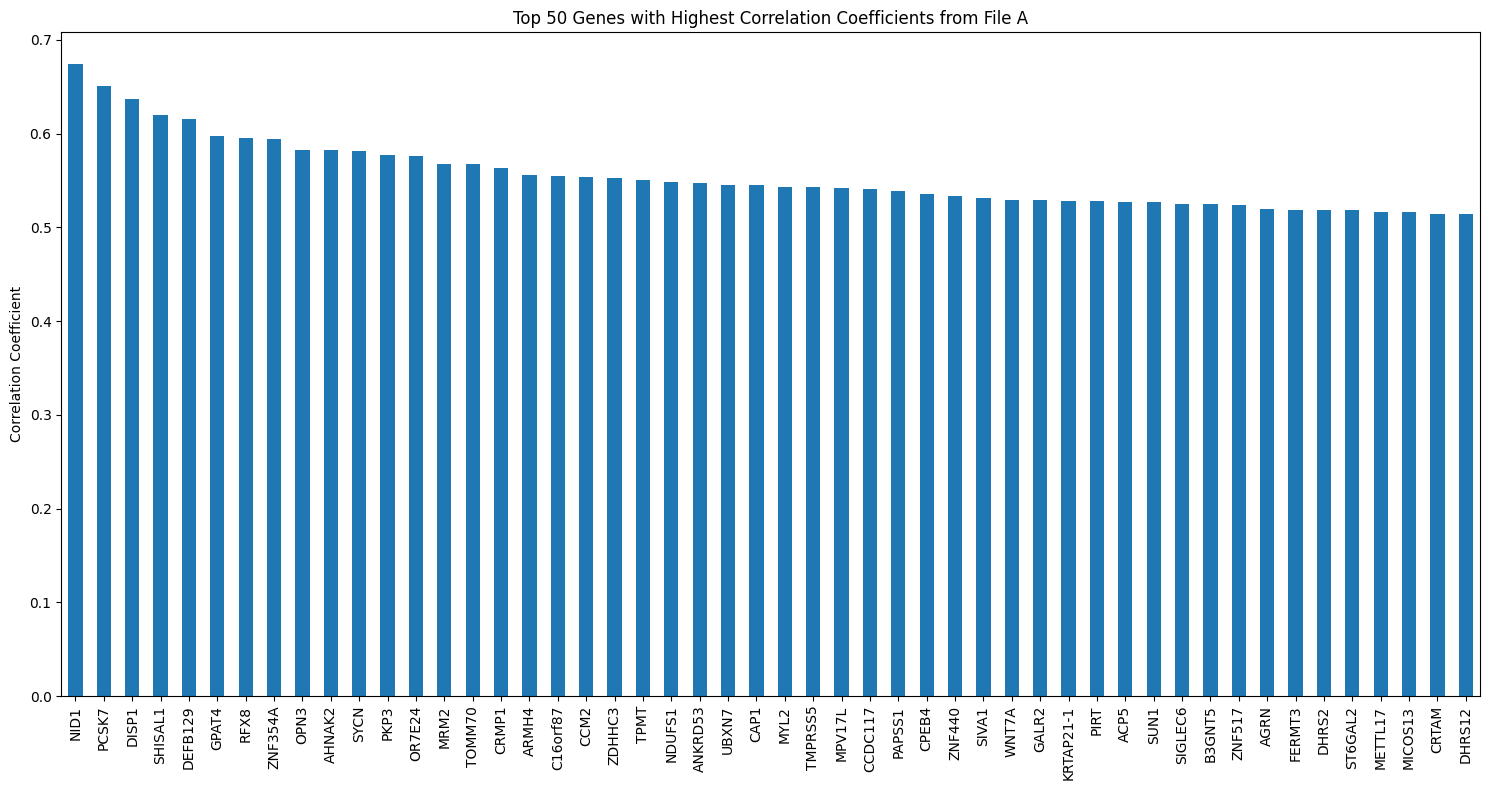

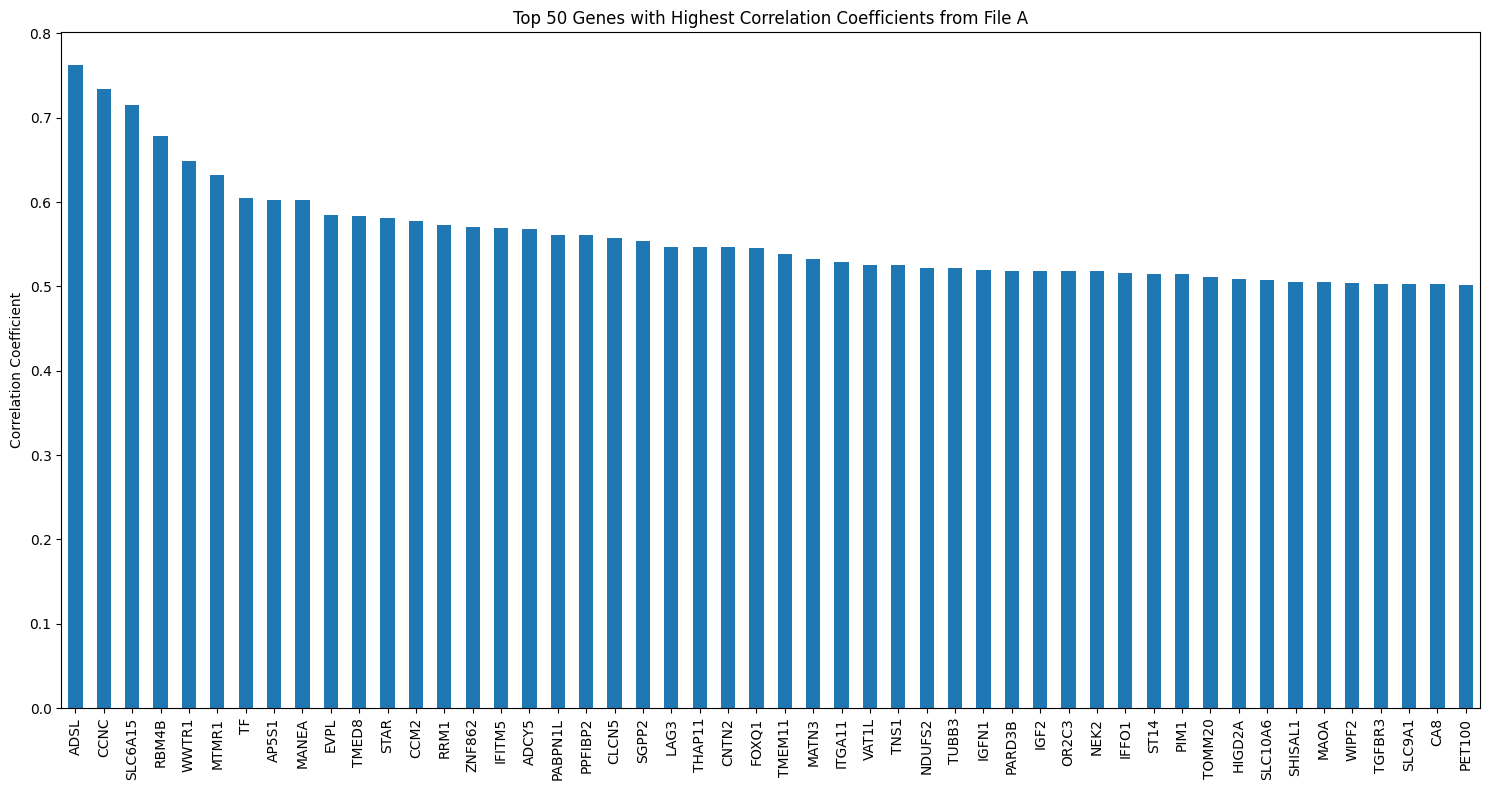

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/macaulay/datas/A_metrics_epoch_3.csv'

In [5]:


for i in range(1, 21):

    file_A = pd.read_csv(f'/mnt/data/macaulay/datas/A_metrics_epoch_{i}.csv')
    file_A = pd.concat([file_A, gene_metadata], axis=1)
    top_50_genes_A = file_A.nlargest(50, 'Correlation_Coefficient', 'all')

    # Plotting
    plt.figure(figsize=(15, 8))
    top_50_genes_A["Correlation_Coefficient"].plot(kind='bar')
    plt.xticks(range(50), top_50_genes_A["Gene"], rotation=90)
    plt.ylabel('Correlation Coefficient')
    plt.title('Top 50 Genes with Highest Correlation Coefficients from File A')
    plt.tight_layout()

    plt.show()


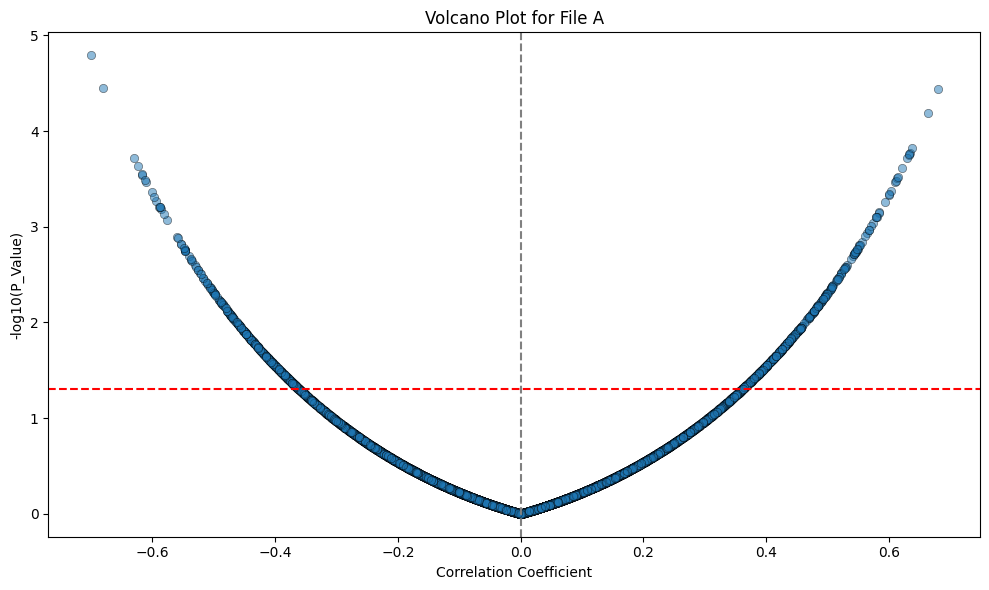

In [11]:
import numpy as np

# Calculate -log10 of the P_Value
file_A["-log10_P_Value"] = -np.log10(file_A["P_Value"])

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(file_A["Correlation_Coefficient"], file_A["-log10_P_Value"], alpha=0.5, edgecolors="k", linewidth=0.5)
plt.title('Volcano Plot for File A')
plt.xlabel('Correlation Coefficient')
plt.ylabel('-log10(P_Value)')
plt.axhline(y=-np.log10(0.05), color='r', linestyle='--')  # Significance threshold
plt.axvline(x=0, color='gray', linestyle='--')
plt.tight_layout()

plt.show()


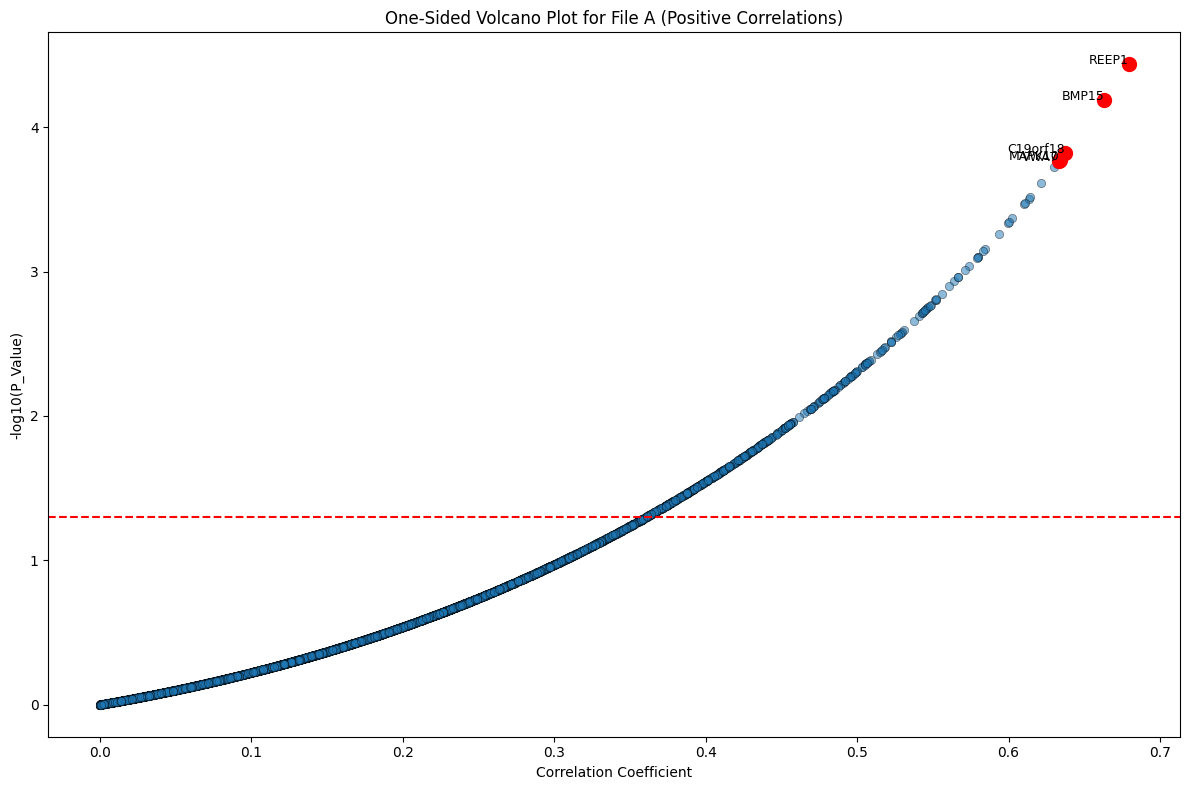

In [12]:
# Filter for positive correlation coefficients
one_sided_data = file_A[file_A["Correlation_Coefficient"] > 0]

# Sort by significance and select top 5
top_5_genes = one_sided_data.nsmallest(5, 'P_Value')

# Plotting
plt.figure(figsize=(12, 8))
plt.scatter(one_sided_data["Correlation_Coefficient"], one_sided_data["-log10_P_Value"], alpha=0.5, edgecolors="k", linewidth=0.5)
plt.scatter(top_5_genes["Correlation_Coefficient"], top_5_genes["-log10_P_Value"], color='red', s=100)
plt.title('One-Sided Volcano Plot for File A (Positive Correlations)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('-log10(P_Value)')
plt.axhline(y=-np.log10(0.05), color='r', linestyle='--')  # Significance threshold

# Annotate the top 5 genes
for _, row in top_5_genes.iterrows():
    plt.annotate(row["Gene"], (row["Correlation_Coefficient"], row["-log10_P_Value"]), fontsize=9, ha='right')

plt.tight_layout()
plt.show()


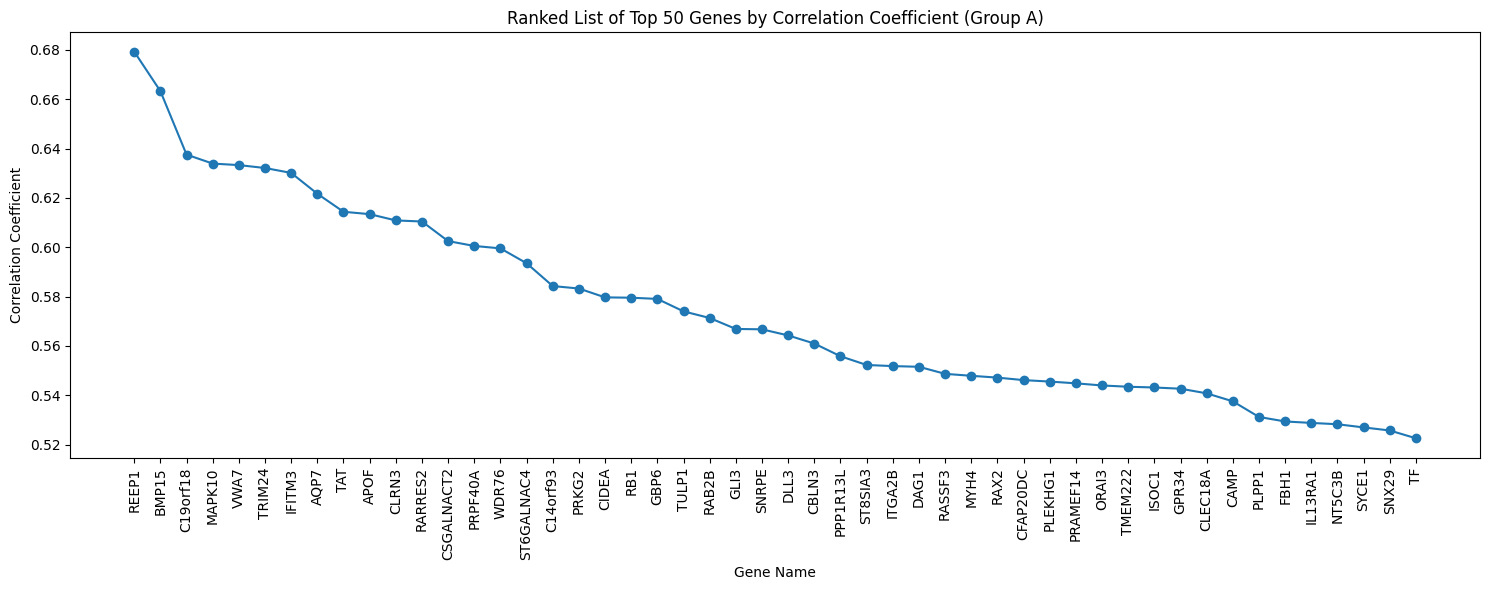

In [13]:
# Rank genes by absolute correlation coefficient and select top 100
top_100_genes_ranked = file_A.nlargest(50, 'Correlation_Coefficient', 'all')

# Plotting
plt.figure(figsize=(15, 6))
plt.plot(top_100_genes_ranked["Gene"], top_100_genes_ranked["Correlation_Coefficient"], marker='o', linestyle='-')
plt.xticks(rotation=90)
plt.xlabel('Gene Name')
plt.ylabel('Correlation Coefficient')
plt.title('Ranked List of Top 50 Genes by Correlation Coefficient (Group A)')
plt.tight_layout()

plt.show()


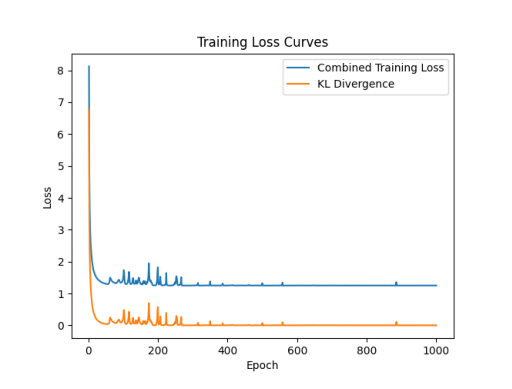

In [14]:
import matplotlib.pyplot as plt
from PIL import Image

# Load the image using PIL (Python Imaging Library)
image_path = '/mnt/data/macaulay/plot_images/vae_loss_curve.png'
img = Image.open(image_path)

# Display the image using Matplotlib
plt.imshow(img)
plt.axis('off')  # Turn off axis labels and ticks
plt.show()


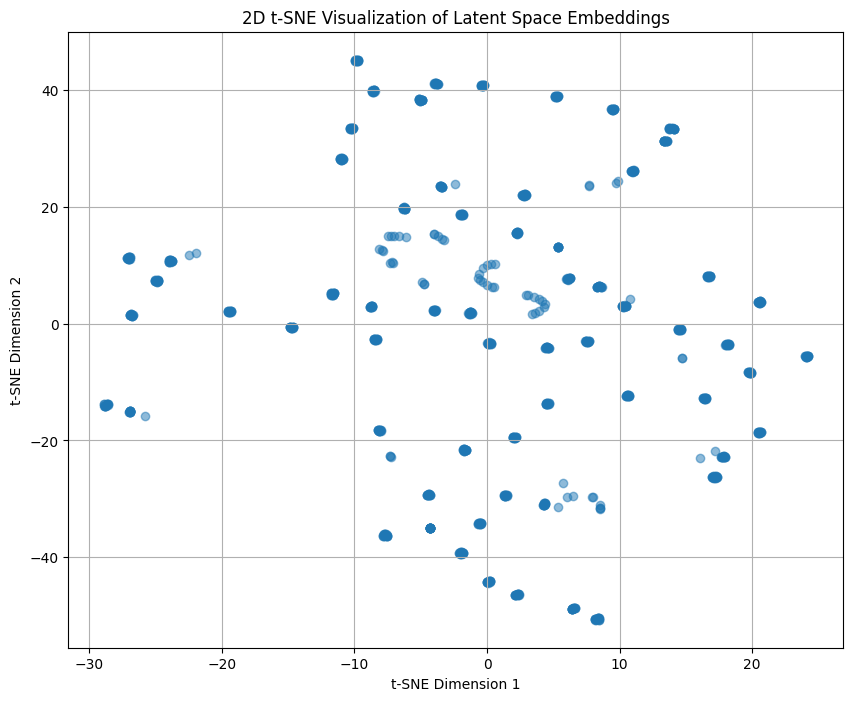

In [16]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Load the embeddings
embeddings_df = pd.read_csv('/mnt/data/macaulay/datas/OmicExpression_embeddings.csv')
embeddings_df = embeddings_df.iloc[:, 1:]
embeddings_array = embeddings_df.values

# Use t-SNE to reduce the embeddings to 2 dimensions
tsne = TSNE(n_components=2, random_state=42)
embeddings_tsne = tsne.fit_transform(embeddings_array)

# Plot the t-SNE reduced embeddings
plt.figure(figsize=(10, 8))
plt.scatter(embeddings_tsne[:, 0], embeddings_tsne[:, 1], alpha=0.5)
plt.title('2D t-SNE Visualization of Latent Space Embeddings')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.grid(True)
plt.show()

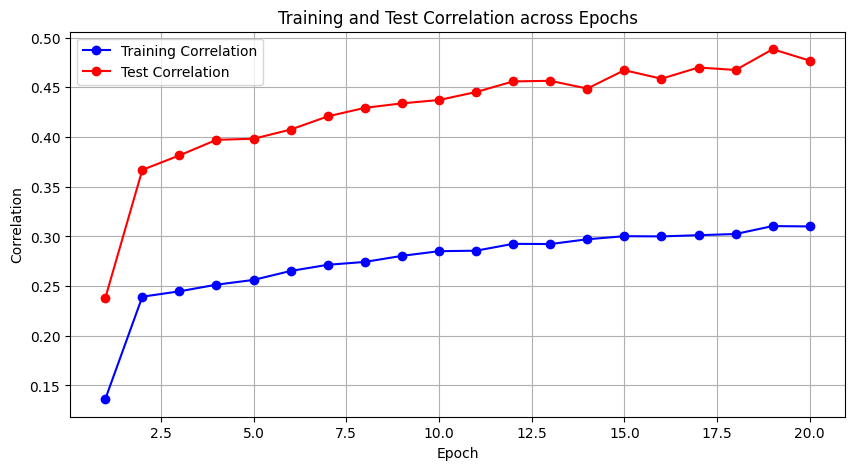

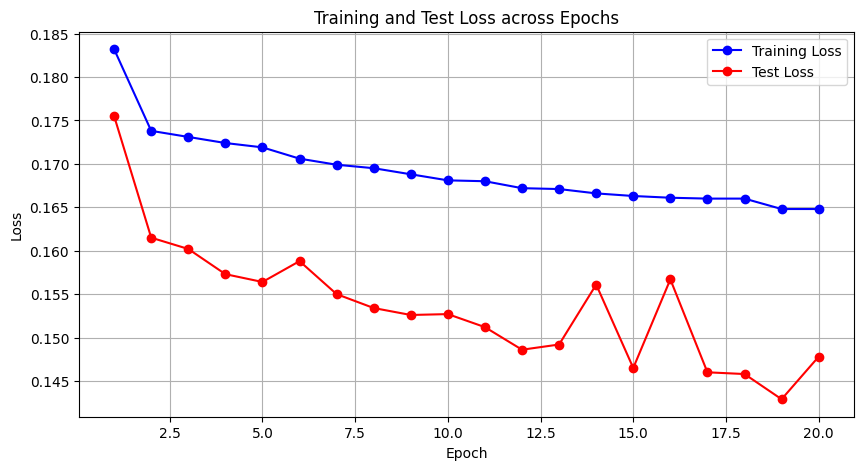

In [12]:
import matplotlib.pyplot as plt

# Data
data = {
    "epoch": list(range(1, 21)),
    "train_loss": [0.1832, 0.1738, 0.1731, 0.1724, 0.1719, 0.1706, 0.1699, 0.1695, 0.1688, 0.1681, 0.1680, 0.1672, 0.1671, 0.1666, 0.1663, 0.1661, 0.1660, 0.1660, 0.1648, 0.1648],
    "train_correlation": [0.1361, 0.2393, 0.2447, 0.2514, 0.2562, 0.2652, 0.2714, 0.2743, 0.2804, 0.2851, 0.2856, 0.2925, 0.2923, 0.2971, 0.3002, 0.3000, 0.3012, 0.3024, 0.3104, 0.3100],
    "test_loss": [0.1755, 0.1615, 0.1602, 0.1573, 0.1564, 0.1588, 0.1550, 0.1534, 0.1526, 0.1527, 0.1512, 0.1486, 0.1492, 0.1561, 0.1465, 0.1567, 0.1460, 0.1458, 0.1429, 0.1478],
    "test_correlation": [0.2378, 0.3670, 0.3815, 0.3972, 0.3983, 0.4075, 0.4208, 0.4294, 0.4339, 0.4373, 0.4453, 0.4560, 0.4566, 0.4488, 0.4673, 0.4587, 0.4700, 0.4675, 0.4884, 0.4769]
}

plt.figure(figsize=(10, 5))
plt.plot(data["epoch"], data["train_correlation"], label="Training Correlation", color="blue", marker="o")
plt.plot(data["epoch"], data["test_correlation"], label="Test Correlation", color="red", marker="o")
plt.title("Training and Test Correlation across Epochs")
plt.xlabel("Epoch")
plt.ylabel("Correlation")
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(data["epoch"], data["train_loss"], label="Training Loss", color="blue", marker="o")
plt.plot(data["epoch"], data["test_loss"], label="Test Loss", color="red", marker="o")
plt.title("Training and Test Loss across Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

